In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import torchvision
from PIL import Image
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor

class Obejct_Detection():
  def __init__(self, checkpoint_path, hidden=1024):
    """
    Model Initialization.
    Input: path to the checkpoint, under /content/drive/MyDrive/ECE496 Team/object_detection/maskrcnn_checkpoints/

    NOTE: Some models have different hidden layers, adjustment needed!!!
    """
    self.device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, 2)
    in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
    model.roi_heads.mask_predictor = MaskRCNNPredictor(in_features_mask,
                              hidden, 2)
    model.to(self.device)
    checkpoint = torch.load(checkpoint_path, map_location=self.device)
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()
    self.model = model
  
  def predict(self, img_path):
    """
    Predict a single image
    Input: path to the image
    Output: A list of 0-1 masks
    """
    img = Image.open(img_path).convert("RGB")
    transform = torchvision.transforms.ToTensor()
    tensor = transform(img)
    with torch.no_grad():
        prediction = self.model([tensor.to(self.device)])
        masks = torch.squeeze(prediction[0]['masks']).cpu().numpy()
        confidences = prediction[0]['scores'].cpu().numpy()
    return masks, confidences

Eaxmple usage

(3, 1080, 1920)
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
Confidence: 0.999743640422821
Confidence: 0.9992002844810486
Confidence: 0.2777460217475891


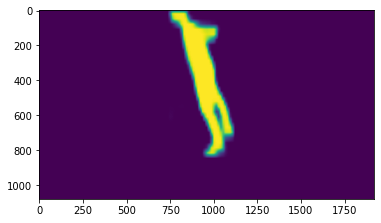

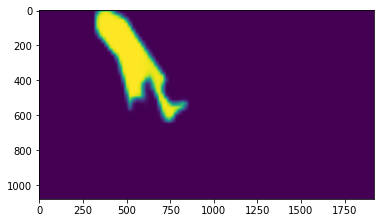

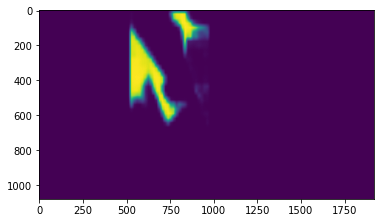

In [ ]:
PATH_CHECKPOINT = "/content/drive/MyDrive/ECE496 Team/object_detection/maskrcnn_checkpoints/best_0328pennfudan_bs2_hidden1024_lr0.01_epoch9.pt"
PATH_IMG = "/content/img_0b64c5a42fa24149a91ad2373857b349_f1.0.png"
od = Obejct_Detection(PATH_CHECKPOINT)
masks, confidences = od.predict(PATH_IMG)

print(masks.shape)
print(masks)

import matplotlib.pyplot as plt
for i in range(len(masks)):
  plt.figure()
  print("Confidence: {}".format(confidences[i]))
  plt.imshow(masks[i])